Probably the first thing to note is Mat's diagram here https://classroom.udacity.com/nanodegrees/nd101/parts/a66f046b-4885-498e-b036-37ba7d7b0e24/modules/2afd43e6-f4ce-4849-bde6-49d7164da71b/lessons/dc37fa92-75fd-4d41-b23e-9659dde80866/concepts/f7c2a82b-7a05-45ac-9e3b-b881a5fb29c1

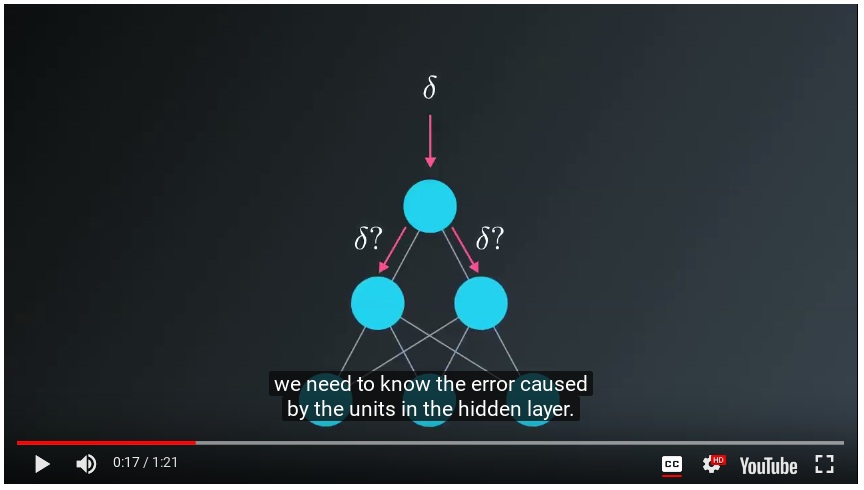

Intuition came after a day thinking and learning about this, and sleeping on it!

Note how he SAYS "we need to know the error caused by the units in the hidden layer".

But he MEANS we need to know the rate of change of the error WRT an output at the hidden layer.

That's why he uses $\delta$ symbol!

"I think" the way Mat phrased it is supposed to be more comprehensible, but the wikipedia article explains what is going on more accurately - and how the actual maths used is derived.

### Wikipedia page on backpropagation

To quote from https://en.wikipedia.org/wiki/Backpropagation#Finding_the_derivative_of_the_error

"Considering $E$ as a function of the inputs of all neurons $L={u,v,\dots ,w}$ receiving input from neuron $j$, ... and taking the total derivative with respect to $o_j$, a recursive expression for the derivative is obtained:
$$\frac{\partial E}{\partial o_j}=\sum_{l\in L}\left(\frac{\partial E}{\partial net_l}\frac{\partial net_l}{\partial o_j}\right)=\sum_{l \in L}\left(\frac{\partial E}{\partial o_l}\frac{\partial o_l}{\partial net_l}w_{jl}\right)$$"

### Intent (the most important thing to understand)

Before we go on, note how this equation expresses $\frac{\partial E}{\partial o_j}$ in terms of derivatives of the layer to its right (plus $w_{jl}$ which is known). Applying this equation recursively, we can go leftward calculating "the partial derivative of E WRT a neuron $j$'s output" at any depth.

The maths is covered more fully in the sections below. But already, intuitively, we can see that we can get $\frac{\partial E}{\partial o_j}$ by taking the sum of similar from the layer to the right $l \in L,\frac{\partial E}{\partial o_l}$ (multiplying in each case by $f'(net_l)$ and $w_{jl}$). We could do this again and again. And backpropogation multiplies by exactly these kinds of factors as it moves left - reassuringly.

### Explanation of the working

Because we are "considering $E$ as a function of the inputs of all neurons $L={u,v,\dots ,w}$ ...", E depends on $o_j$ only indirectly - all inputs to neurons L depend on $o_j$. We use the multivariable chain rule:
$$\frac{\partial E}{\partial o_j}=\sum_{l\in L}\left(\frac{\partial E}{\partial net_l}\frac{\partial net_l}{\partial o_j}\right)$$
See https://www.math.hmc.edu/calculus/tutorials/multichainrule/ and https://en.wikipedia.org/wiki/Chain_rule#Higher_dimensions.

Let's focus on one part of the above namely
$$\frac{\partial E}{\partial net_l}$$
Use the chain rule to get **(2)**:
$$\frac{\partial E}{\partial net_l}=\frac{\partial E}{\partial o_l}\frac{\partial o_l}{\partial net_l}$$

Now, for the same reason that
$$\frac{\partial net_l}{\partial w_{jl}}=o_j$$
we have **(3)**
$$\frac{\partial net_l}{\partial o_j}=w_{jl}$$

Substituting **(2)** and **(3)** into the left sum in the wikipedia equation **(1)**, we get the righthand sum (and very useful expression) in said wikipedia equation **(1)** i.e.
$$\sum_{l \in L}\left(\frac{\partial E}{\partial o_l}\frac{\partial o_l}{\partial net_l}w_{jl}\right)$$

## Finally

From the same wikipedia section https://en.wikipedia.org/wiki/Backpropagation#Finding_the_derivative_of_the_error

"Calculating the partial derivative of the error with respect to a weight $w_{ij}$ is done using the chain rule twice:
$$\frac{\partial E}{\partial w_{ij}}=\frac{\partial E}{\partial o_j}\frac{\partial o_j}{\partial net_j}\frac{\partial net_j}{\partial w_{ij}}$$"

Where straight after, in the article, it is shown the last factor is resolved to $o_i$. (So $\frac{\partial E}{\partial w_{ij}}=\frac{\partial E}{\partial o_j}\frac{\partial o_j}{\partial net_j}o_i$.)

I can't see an explicit definition but I think the wikipedia article implicitly uses this definition of $\delta_j$ (matching Mat's) **(4)**:
$$\delta_j=\frac{\partial E}{\partial o_j}\frac{\partial o_j}{\partial net_j}$$
Where **(4)**'s second factor
$$\frac{\partial o_j}{\partial net_j}=f'(net_j)$$
and **(4)**'s first factor
* either $o_j$ is an inner neuron and we use the righthand sum of the wikipedia equation **(1)**
$$\frac{\partial E}{\partial o_j}=\sum_{l \in L}\left(\frac{\partial E}{\partial o_l}\frac{\partial o_l}{\partial net_l}w_{jl}\right)$$ or $$=\sum_{l \in L}\left(\delta_l w_{jl}\right)$$
* or where $o_j$ is an output neuron (when combined with $f'$ this would lead to the $\delta$ taught in the dl-2-13 "Gradient Descent: The Math")
$$\frac{\partial E}{\partial o_j}=\frac{\partial}{\partial o_j}\left(\frac{1}{2}\sum_\mu(y_\mu-\hat{y}_\mu)^2\right)=-\sum_\mu y_\mu-\hat{y}_\mu$$
(or in the style of the wikipedia article
$$=\sum_\mu \hat{y}_\mu-y_\mu$$)

Hence the final expressions for $\delta_j$ of section https://en.wikipedia.org/wiki/Backpropagation#Finding_the_derivative_of_the_error.